In [1]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import pandas as pd 
import numpy as np 
from config import PLOT_PATH, DATABASE_PATH
from utils import load_from_pickle
from os import path
from matplotlib import cm

## 0.1 set palette

In [2]:
dark_dict = {
    'red':'#612d21',
    'blue':'#435a97',
    'purple':'#423a75',
    'green':'#4c723c',
    'orange':'#875b31',
    'gray':'#272b29',
    'black':'#10100e'}
normal_dict = {
    'red':'#ab4842',
    'blue':'#6c94cf',
    'purple':'#574d93',
    'green':'#708d62',
    'orange':'#d39d51',
    'gray':'#989e94',
    'black':'#3d3e43'}
light_dict = {
    'red':'#d0a0ac',
    'blue':'#8db4e0',
    'purple':'#7d88b3',
    'green':'#a7d393',
    'orange':'#d39d51',
    'gray':'#ededed',
    'black':'#babcb7'}
special_dict = {
    'red':'#832522',
    'blue':'#2d4b93',
    'orange':'#c38b3c'}
nature_dict = {
    'red':'#832522',
    'blue':'#435a97',
    'orange':'#c38b3c',
    'pink':'#ca7e8d',
    'green':'#4c723c',
    'black':'#101010'}
def get_pal(col_dict, nmidx):
    if isinstance(nmidx, int):
        return list(col_dict.values())[nmidx]
    elif isinstance(nmidx, str):
        return col_dict[nmidx]
    elif isinstance(nmidx, (list, np.ndarray)):
        try:
            return [col_dict[i] for i in nmidx]
        except:
            return [list(col_dict.values())[i] for i in nmidx]
    

In [3]:
snsdeep = sns.color_palette('deep', 10)
snsdark = sns.color_palette('dark', 10)
snsset2 = sns.color_palette('Set2', 10)

In [4]:
sns.set_theme(
        style='ticks',
        context='talk',
        palette='deep')
params = {
    'font.family':'serif',
    'font.serif':'Times New Roman',
    'font.style':'normal',
    'font.weight':'normal', #or 'blod'
    'pdf.fonttype':42
    # 'font.size':'medium',#or large,small
}
rcParams.update(params)

## 0.2 set index dict

In [5]:
mutypes = ['snp', 'indel']
pcodes = ['HG00'+str(i) for i in range(1,8) if i != 5]
addpcodes = ['HCC1395BL_hg38', 'HCC1395FFPE_hg38', 'HCC1395_hg38', 'NA12877']
depthlist = ['30X', '50X', 'Additional_data']

order_test = order_train = {'1':'1', '50':'50', '100':'100', '200':'200', '0':'original'}
order_filter = {'tc': 'FNVC', 'freq': 'Frequency', 'garfield': 'Garfield', 'vqsr': 'VQSR', 'hf': 'Hard Filter'}
order_patient = {'CV': pcodes, 'Add': addpcodes}
fix_varscan = {'varscan2':'varscan'}
order_caller = {'gatk':'GATK', 'varscan': 'Varscan2', 'mutect2':'Mutect2'}
order_caller2 = {'gatk':'GATK', 'varscan2':'Varscan2', 'mutect2':'Mutect2'}
order_model = {'logireg':'LR', 'lsvm':'LSVM', 'nn':'MLP', 'lgbdef':'LGBM', 'rf':'RF', 'xgbdef':'XGBoost'}
order_strategy = {'0.0-0.0':'original', 'smote':'SMOTE', 'randomover':'oversampldf2e', 'nearmiss1':'NearMiss', '1.0-0.0':'undersample'}
order_coding = {1:'Coding', 0:'Non-coding'}
order_filter_inconsis = {'FNVC':'FNVC', 'Frequency':'Frequency', 'Gar':'Garfield', 'VQSR':'VQSR', 'HF':'Hard Filter'}
order_filter_consis = {'FNVC':'FNVC', 'Gar': 'Garfield'}

# 1. workflow

# 2/3. balanced train testing on different imbalanced data

In [6]:
data2_df = load_from_pickle('./release/data2_BTrImbTe.pickle', DATABASE_PATH)
data2_df['ratio test'] = data2_df['ratio test'].astype(str)
data2_df['ratio test'] = data2_df['ratio test'].map(order_test)
data2_df['order_test'] = data2_df['ratio test'].apply(lambda x: list(order_test.values()).index(x))
data2_df['model'] = data2_df['model'].map(order_model)
data2_df['order_model'] = data2_df['model'].apply(lambda x: list(order_model.values()).index(x))
# data2_df

loading ./release/data2_BTrImbTe.pickle from /mnt/d/Document/Master/ProjectRYY/plot


In [7]:
data21_df = data2_df.loc[data2_df['model']=='LR'].melt(id_vars=['model','seed','mutation','patient','ratio train','ratio test','depth','order_test','order_model'], value_vars=['AUC','MCC','BACC','F1-score','Sensitivity(Recall)','Specificity','Precision','AUPRC','OFO','G1-score'],value_name='values',var_name='metrics')
# data21_df

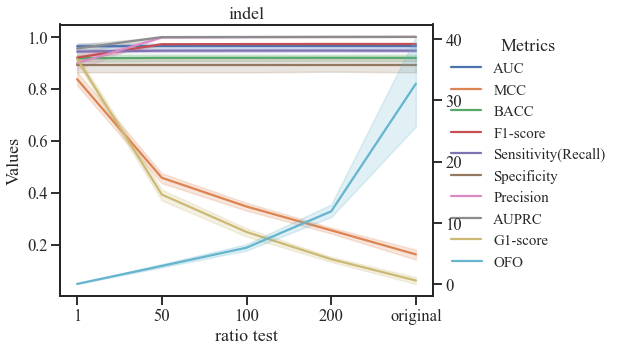

In [8]:
mutation = 'indel'
plt.figure(figsize=(9,5))
plt.title(mutation)
# g = sns.FacetGrid(data=data21_df, row='mutation', height=4, aspect=2)
ax = sns.lineplot(data=data21_df.loc[(data21_df['mutation']==mutation)&(data21_df['metrics']!='OFO')],
    x='ratio test', y='values', hue='metrics', palette=[snsdeep[i] for i in range(9)])
ax.set_ylabel('Values')
plt.legend(title='Metrics', title_fontsize='medium',
    bbox_to_anchor=(1.5,1), loc='upper right', 
    fontsize='small', markerscale=0.5, frameon=False)
ax2 = ax.twinx()
sns.lineplot(data=data21_df.loc[(data21_df['mutation']==mutation)&(data21_df['metrics']=='OFO')],
    x='ratio test', y='values', hue='metrics', palette=[snsdeep[i] for i in [9]], ax=ax2)
ax2.set_ylabel(None)
plt.legend(bbox_to_anchor=(1.28,0.2), loc='upper right',
    fontsize='small', markerscale=0.5, frameon=False)
plt.subplots_adjust(right=0.7)
# plt.savefig('../plot/fig/2_metr_{}.pdf'.format(mutation))
plt.show()

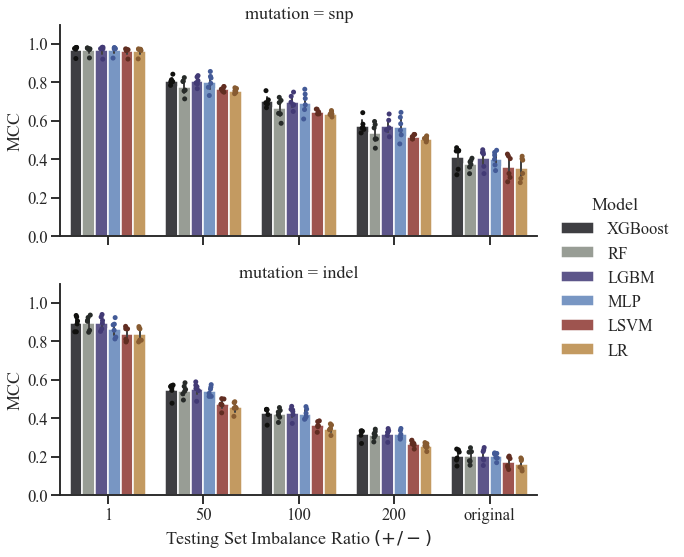

In [9]:
y_metrname = 'MCC'
g = sns.FacetGrid(data=data2_df, row='mutation', height=4, aspect=2)
g.map(sns.barplot, 'ratio test', y_metrname, 'model', hue_order=list(order_model.values())[::-1], 
    palette=get_pal(normal_dict, ['black','gray','purple','blue','red','orange']), errwidth=2)
g.add_legend(title='Model')
g.map(sns.stripplot, 'ratio test', y_metrname, 'model', hue_order=list(order_model.values())[::-1],
    palette=get_pal(dark_dict, ['black','gray','purple','blue','red','orange']), dodge=True)
g.set_xlabels('Testing Set Imbalance Ratio $(+/-)$')
g.set_ylabels(y_metrname)
plt.ylim((0,1.1))
# plt.savefig('../plot/fig/3_{}_{}.pdf'.format(state, y_metrname))
plt.show()


# 4. rebalanced training and original testing

In [10]:
data4_df = load_from_pickle('./release/data4_RebTrImbTe.pickle', DATABASE_PATH)
data4_df = data4_df.loc[data4_df['balance strategy']!='balanced']
data4_df['model'] = data4_df['model'].map(order_model)
data4_df['balance strategy'] = data4_df['balance strategy'].map(order_strategy)
data4_df['order_model'] = data4_df['model'].apply(lambda x: list(order_model.values()).index(x))
data4_df['order_strategy'] = data4_df['balance strategy'].apply(lambda x: list(order_strategy.values()).index(x))
# data3_df

loading ./release/data4_RebTrImbTe.pickle from /mnt/d/Document/Master/ProjectRYY/plot


In [11]:
from scipy.stats import wilcoxon, ranksums, mannwhitneyu, ttest_rel
def noparam_wrm(x,y):
    return [np.mean(x), np.std(x), np.mean(y), np.std(y), *ttest_rel(x,y,alternative='greater')]

In [12]:
y_metrname = 'MCC'
tab4in_list = []
for mut in ['indel','snp']:
    for model in ['LR','LSVM','MLP','RF','LGBM']:
        x = data4_df.loc[
            (data4_df['balance strategy']=='original')&
            (data4_df['mutation']==mut)&
            (data4_df['model']=='XGBoost')][y_metrname].values
        y = data4_df.loc[
            (data4_df['balance strategy']=='original')&
            (data4_df['mutation']==mut)&
            (data4_df['model']==model)][y_metrname].values
        # print(x.shape, y.shape)
        tab4in_list.append([mut,model,*noparam_wrm(x,y)])
tab4in = pd.DataFrame(np.array(tab4in_list), columns=['Mutation','Model','XGBoost Ave','XGBoost SD','Model Ave','Model SD','statistic','pvalue'])
# tab4in.to_excel('../plot/tab/Table4in.xlsx')

In [13]:
tab4in

,Mutation,Model,XGBoost Ave,XGBoost SD,Model Ave,Model SD,statistic,pvalue
0,indel,LR,0.7210833063676786,0.053791584726879366,0.4410547562026152,0.06362118784844632,25.789903897357565,8.185677129414995e-07
1,indel,LSVM,0.7210833063676786,0.053791584726879366,0.19445628051626274,0.04205654696522627,24.852053241882015,9.839157355966272e-07
2,indel,MLP,0.7210833063676786,0.053791584726879366,0.6073870731514669,0.08058602526639554,7.97124738398665,0.0002506483018377822
3,indel,RF,0.7210833063676786,0.053791584726879366,0.709829512977472,0.04842699514710638,2.2153142333511253,0.03879202994054309
4,indel,LGBM,0.7210833063676786,0.053791584726879366,0.49037476207395453,0.07333861696053773,12.783405281840684,2.606034558919199e-05
5,snp,LR,0.9019278498583824,0.028511803872459066,0.8074516153983637,0.0582311145990483,6.655101424484491,0.0005778148303697538
6,snp,LSVM,0.9019278498583824,0.028511803872459066,0.8048621386584465,0.050824186582390525,8.799762965032604,0.000157264539402722
7,snp,MLP,0.9019278498583824,0.028511803872459066,0.8609042816494896,0.036258782597203595,9.918738935834993,8.888340638796631e-05
8,snp,RF,0.9019278498583824,0.028511803872459066,0.8954235325957761,0.02672351085421549,2.991196414984569,0.015202725714292431
9,snp,LGBM,0.9019278498583824,0.028511803872459066,0.7358599657976742,0.05727145254034507,7.502696321761325,0.0003325703780234549


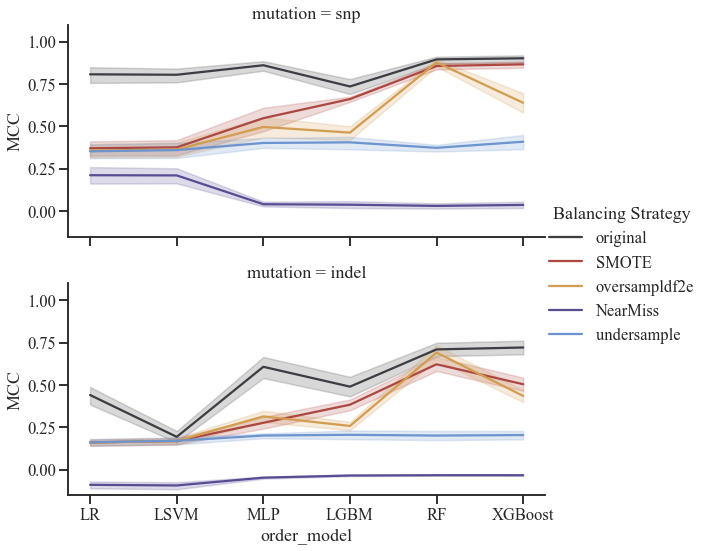

In [14]:
y_metrname = 'MCC'
g = sns.FacetGrid(data=data4_df, row='mutation', height=4, aspect=2)
g.map(sns.lineplot, 'order_model', y_metrname, 'balance strategy', hue_order=list(order_strategy.values()), 
    palette=get_pal(normal_dict, ['black','red','orange','purple','blue']))
plt.xticks(np.arange(len(order_model)), list(order_model.values()))
g.add_legend(title='Balancing Strategy')
plt.ylim((-0.15,1.1))
# plt.savefig('../plot/fig/4_{}.pdf'.format(y_metrname))
plt.show()


# the filter performances based on various callers

# 5. ROC and decision points for diafferent filters and different callers

In [15]:
def nanlog10(x):
    if x > 0:
        return np.log10(x)
    else:
        return np.nan

In [16]:
data6_df_list = []
for caller in order_caller.keys():
    dataset = 'CV'
    data6_df_ = load_from_pickle('./release/data6_{}{}.pickle'.format(caller, dataset), DATABASE_PATH)
    data6_df_ = data6_df_.loc[data6_df_['filter'] != 'gf']
    data6_df_['filter'] = data6_df_['filter'].map(order_filter)
    data6_df_['depth'] = data6_df_['depth'].apply(lambda x: x.upper())
    data6_df_['order'] = data6_df_['patient'].apply(lambda x: order_patient[dataset].index(x))
    data6_df_['caller'] = order_caller[caller]
    data6_df_list.append(data6_df_)
data6_df = pd.concat(data6_df_list, axis=0)
data6_df['order_filter'] = data6_df['filter'].apply(lambda x: list(order_filter.values()).index(x))
data6_df['log OFO'] = data6_df['OFO'].apply(nanlog10)
# data6_df

loading ./release/data6_gatkCV.pickle from /mnt/d/Document/Master/ProjectRYY/plot
loading ./release/data6_varscanCV.pickle from /mnt/d/Document/Master/ProjectRYY/plot
loading ./release/data6_mutect2CV.pickle from /mnt/d/Document/Master/ProjectRYY/plot


In [17]:
data51_df = data6_df.copy()
data51_df['fpr'] = 1 - data51_df['Specificity']
data51_df['tpr'] = data51_df['Sensitivity(Recall)']
data51_df['filterpl'] = data51_df['filter'].apply(lambda x: x+'p')
data51_df = data51_df[['fpr','tpr','AUC','MCC','ACC','G1-score','Sensitivity(Recall)','Specificity','OFO','caller','mutation','patient','filter','filterpl','depth']]

In [18]:
order_caller = {'gatk':'GATK', 'mutect2':'Mutect2', 'varscan':'Varscan2'}
order_filterl = {'tc':'FNVC', 'garfield':'Garfield', 'vqsr':'VQSR'}
order_filterp = order_filter

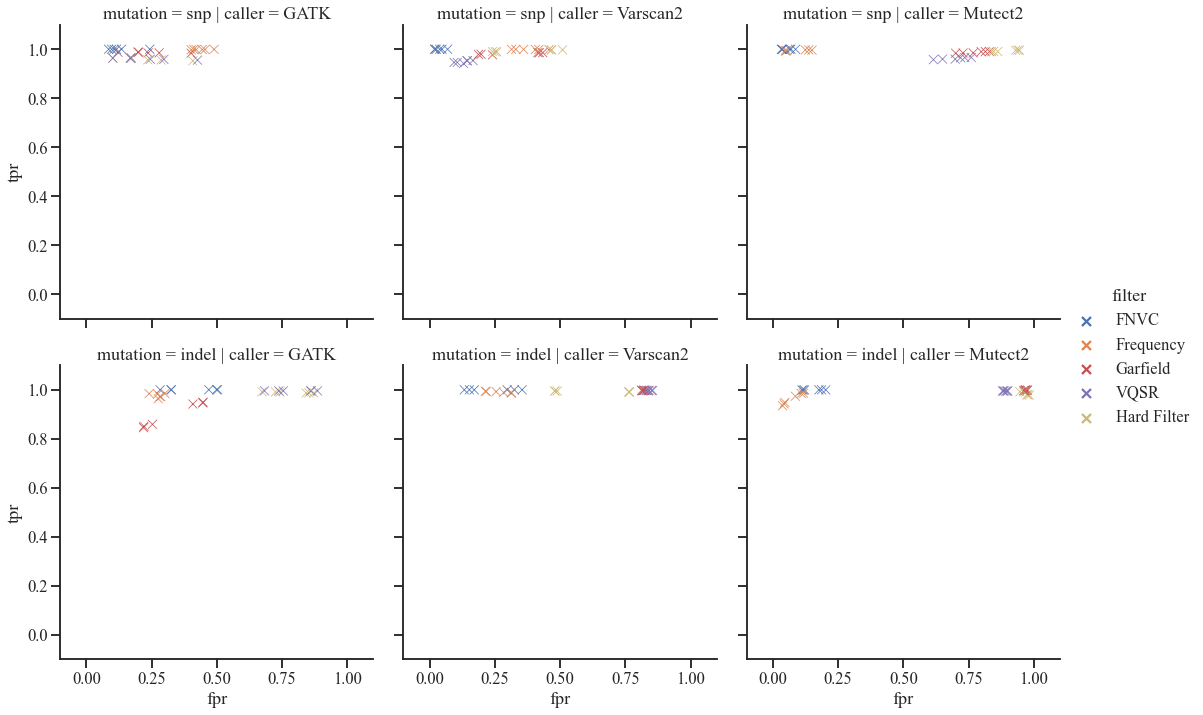

In [19]:
depth = '30X'
g = sns.relplot(data=data51_df.loc[data51_df['depth']==depth], row='mutation', col='caller', kind='scatter', height=5, aspect=1,
    x='fpr', y='tpr', style='filter', markers=['x']*len(order_filterp),
    hue='filter', hue_order=list(order_filterp.values()), 
    palette=[snsdeep[i] for i in [0,1,3,4,8]])
g.set(xlim=(-0.1,1.1), ylim=(-0.1,1.1))
# g.savefig('../plot/fig/5_point_{}.pdf'.format(depth))

In [20]:
data52_df = load_from_pickle('./release/data5_forauc_{}_sparse.pickle'.format(depth), DATABASE_PATH)
data52_df.columns = ['fpr','tpr','caller','mutation','patient','filter']
data52_df['caller'] = data52_df['caller'].map(order_caller)
data52_df['filter'] = data52_df['filter'].map(order_filterl)
data52_df['filterpl'] = data52_df['filter'].apply(lambda x: x+'l')


loading ./release/data5_forauc_30X_sparse.pickle from /mnt/d/Document/Master/ProjectRYY/plot


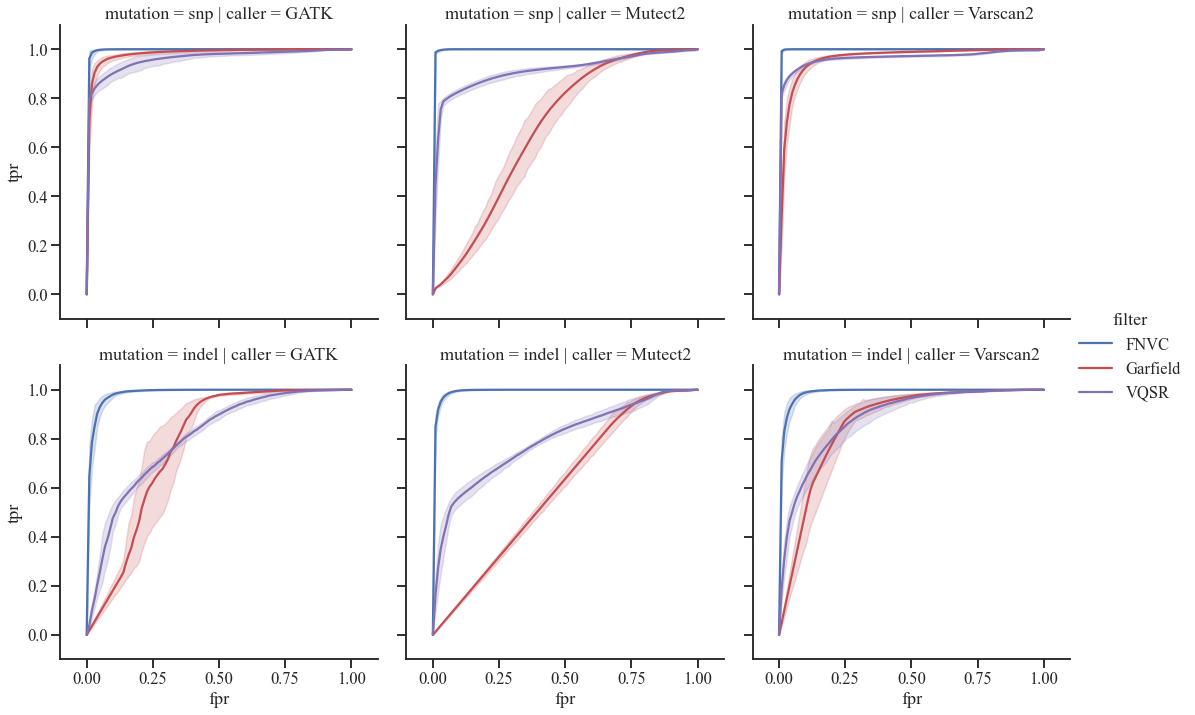

In [21]:
g = sns.relplot(data=data52_df, row='mutation', col='caller', kind='line', height=5, aspect=1,
    x='fpr', y='tpr', hue='filter', hue_order=list(order_filterl.values()),
    palette=[snsdeep[i] for i in [0,3,4]])
g.set(xlim=(-0.1,1.1), ylim=(-0.1,1.1))
# g.savefig('../plot/fig/5_line_{}.pdf'.format(depth))

# 6. extra filter methods and our models based on the feature from different callers

In [22]:
def dfs_to_sheet(df_list, sheetname_list, filename='temp', root_path='./'):
    '''
    Save a list of csvs into a multi-sheet excel,
        providing list of df and their expected sheet names.
    Return None
    '''
    excel_fn = path.join(root_path, filename)
    excelWriter = pd.ExcelWriter(excel_fn)
    for df,fn in zip(df_list, sheetname_list):
        df.to_excel(excelWriter, sheet_name=fn)
    excelWriter.save()

In [23]:
data6_df['True'] = data6_df[['TP','FN']].sum(axis=1)
data6_df['False'] = data6_df[['TN','FP']].sum(axis=1)
metr_out = ['depth','caller','patient','filter','True','False']
metr_alas = ['Depth','Software','Patient','Filter','True variants', 'False variants']
data6_df_tab2 = data6_df[metr_out]
data6_df_tab2.columns = metr_alas
tab2_pre = data6_df_tab2.groupby(by=['Depth','Software','Patient','Filter'],group_keys=['Depth','Software','Patient','Filter']).apply(np.sum, axis=0)[['True variants','False variants']]
tab2_pre['Ratio'] = tab2_pre['True variants'] / tab2_pre['False variants']

tab2_pcnum = tab2_pre[['True variants','False variants']].groupby(by=['Depth','Software','Patient']).apply(np.mean, axis=0)
tab2_alnum_mn = tab2_pre[['True variants','False variants']].groupby(by=['Depth','Software']).apply(np.mean, axis=0)
tab2_alnum_sd = tab2_pre[['True variants','False variants']].groupby(by=['Depth','Software']).apply(np.std, axis=0)
tab2_pcrat = tab2_pre['Ratio'].groupby(by=['Depth','Software','Patient']).apply(np.mean, axis=0)
tab2_alrat_mn = tab2_pre['Ratio'].groupby(by=['Depth','Software']).apply(np.mean, axis=0)
tab2_alrat_sd = tab2_pre['Ratio'].groupby(by=['Depth','Software']).apply(np.std, axis=0)

# dfs_to_sheet(
#     [tab2_pcnum,tab2_alnum_mn,tab2_alnum_sd,tab2_pcrat,tab2_alrat_mn,tab2_alrat_sd],
#     ['#Var','Ave #Var','SD #Var','%Var','Ave %Var','SD %Var'], '../plot/tab/Table2.xlsx')

In [24]:
metr_out = ['depth','mutation','caller','filter','AUC','MCC','G1-score','OFO','BACC','Sensitivity(Recall)','Specificity','AUPRC','F1-score','ACC','TN','FN','TP','FP']
metr_alas = ['Depth','Mutation','Software','Method','AUC','MCC','F1-minar','OFO','BACC','TPR','TNR','AUPRC','F1-major','ACC','TN','FN','TP','FP']
data6_df_tab4 = data6_df[metr_out]
data6_df_tab4.columns = metr_alas
tab4_mn = data6_df_tab4.groupby(by=['Depth','Mutation','Software','Method']).apply(np.mean, axis=0)
tab4_sd = data6_df_tab4.groupby(by=['Depth','Mutation','Software','Method']).apply(np.std, axis=0)
# dfs_to_sheet([tab4_mn,tab4_sd], ['average', 'standard variance'], '../plot/tab/Table5mut.xlsx')

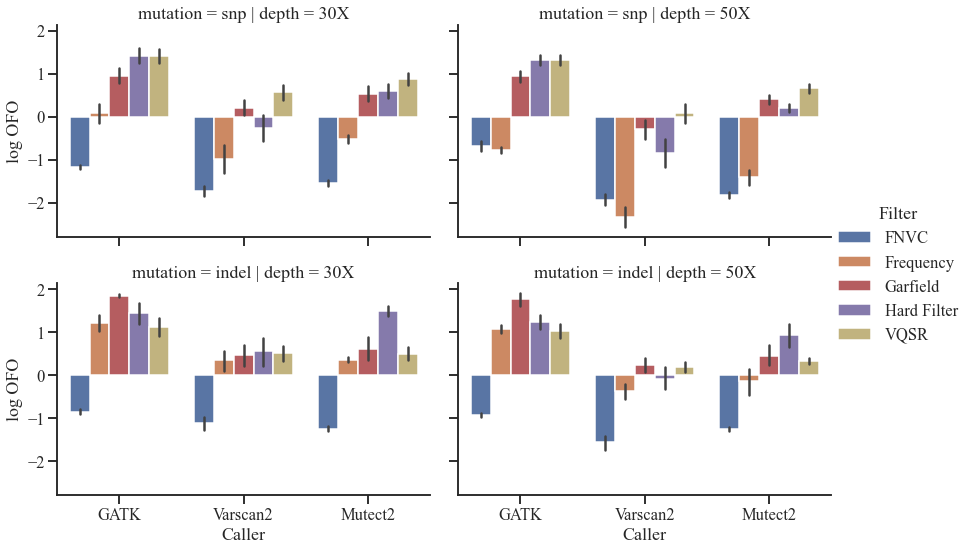

In [25]:
y_metrname = 'log OFO' # change it to MCC
g = sns.FacetGrid(data=data6_df, row='mutation', col='depth', height=4, aspect=1.5)
g.map(sns.barplot, 'caller', y_metrname, 'filter', errwidth=2.5,
    palette=[snsdeep[i] for i in [0,1,3,4,8]])
g.set_xlabels('Caller')
g.add_legend(title='Filter')
# g.savefig('../plot/fig/6_{}_bar.pdf'.format(y_metrname))
plt.show()

# 7. Group by frequency
(<0.2 inconsis, >0.2 consis)

In [26]:
data7_df_less = load_from_pickle('data7_less.pickle', DATABASE_PATH)
data7_df_greater = load_from_pickle('data7_greater.pickle', DATABASE_PATH)
data7_df_less['state'] = 'Low Frequency'
data7_df_greater['state'] = 'High Frequency'
data7_df = pd.concat((data7_df_less, data7_df_greater))
for i in range(10):
    data7_df[data7_df.columns[i]] = data7_df[data7_df.columns[i]].astype(float)
data7_df['caller'] = data7_df['caller'].map(order_caller2)
data7_df['filter'] = data7_df['filter'].map(order_filter_inconsis)
data7_df['order_filter'] = data7_df['filter'].apply(lambda x: list(order_filter.values()).index(x))
data7_df['log OFO'] = data7_df['OFO'].apply(nanlog10)

loading data7_less.pickle from /mnt/d/Document/Master/ProjectRYY/plot
loading data7_greater.pickle from /mnt/d/Document/Master/ProjectRYY/plot


In [27]:
data7_df['True'] = data7_df[['TP','FN']].sum(axis=1)
data7_df['False'] = data7_df[['TN','FP']].sum(axis=1)
metr_out = ['depth','state','caller','pcode','True','False']
metr_alas = ['Depth','State','Software','Patient','True variants', 'False variants']
data7_df_tab3 = data7_df[metr_out]
data7_df_tab3.columns = metr_alas

tab3_pre = data7_df_tab3.groupby(by=['Depth','State','Software','Patient']).apply(np.mean, axis=0)[['True variants','False variants']]
tab3_pre['Ratio'] = tab3_pre['True variants'] / tab3_pre['False variants']

tab3_pcnum = tab3_pre[['True variants','False variants']].groupby(by=['Depth','State','Software','Patient']).apply(np.mean, axis=0)
tab3_alnum_mn = tab3_pre[['True variants','False variants']].groupby(by=['Depth','State','Software']).apply(np.mean, axis=0)
tab3_alnum_sd = tab3_pre[['True variants','False variants']].groupby(by=['Depth','State','Software']).apply(np.std, axis=0)
tab3_pcrat = tab3_pre['Ratio'].groupby(by=['Depth','State','Software','Patient']).apply(np.mean, axis=0)
tab3_alrat_mn = tab3_pre['Ratio'].groupby(by=['Depth','State','Software']).apply(np.mean, axis=0)
tab3_alrat_sd = tab3_pre['Ratio'].groupby(by=['Depth','State','Software']).apply(np.std, axis=0)

# dfs_to_sheet(
#     [tab3_pcnum,tab3_alnum_mn,tab3_alnum_sd,tab3_pcrat,tab3_alrat_mn,tab3_alrat_sd],
#     ['#Var','Ave #Var','SD #Var','%Var','Ave %Var','SD %Var'], '../plot/tab/Table3.xlsx')


In [28]:
data7_df['True'] = data7_df[['TP','FN']].sum(axis=1)
data7_df['False'] = data7_df[['TN','FP']].sum(axis=1)
metr_out = ['depth','state','caller','filter','MCC','G1-score','OFO','BACC','Sensitivity(Recall)','Specificity']
metr_alas = ['Depth','State','Software','Method','MCC','F1-minor','OFO','BACC','TPR','TNR']
data7_df_tabfig6 = data7_df[metr_out]
data7_df_tabfig6.columns = metr_alas
tabfig6_mn = data7_df_tabfig6.groupby(by=['Depth','State','Software','Method']).apply(np.mean, axis=0)
tabfig6_sd = data7_df_tabfig6.groupby(by=['Depth','State','Software','Method']).apply(np.std, axis=0)
# dfs_to_sheet([tabfig6_mn,tabfig6_sd], ['average', 'standard variance'], '../plot/tab/Table_fig6.xlsx')
# tabfig6_mn

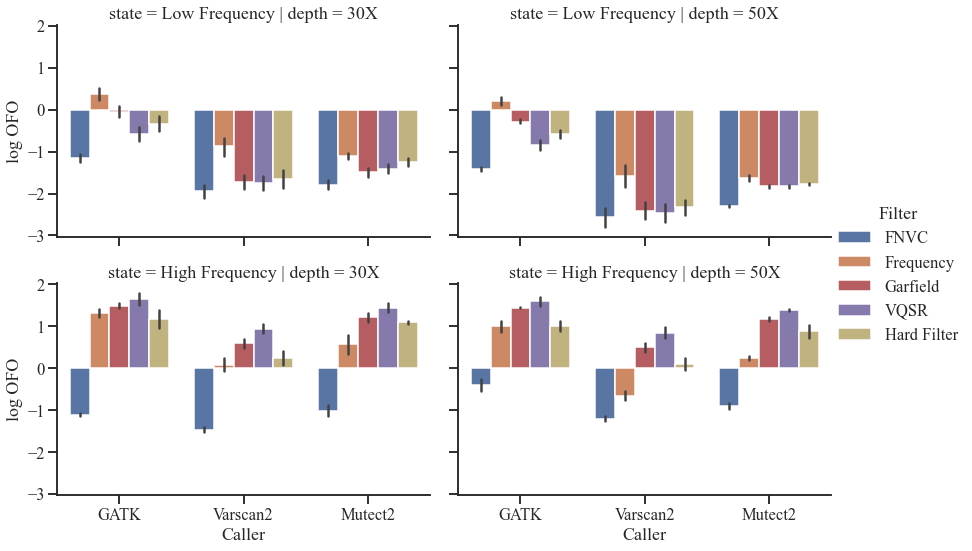

In [29]:
y_metrname = 'log OFO'
g = sns.FacetGrid(data=data7_df, row='state', col='depth', height=4, aspect=1.5)
g.map(sns.barplot, 'caller', y_metrname, 'filter', order=['GATK', 'Varscan2', 'Mutect2'],
    hue_order=list(order_filter.values()), palette=[snsdeep[i] for i in [0,1,3,4,8]], errwidth=2.5)

g.set_xlabels('Caller')
g.add_legend(title='Filter')
# g.set(ylim=(-0.1,1.1))
# g.savefig(path.join(PLOT_PATH, '7_{}.pdf'.format(y_metrname)))
plt.show()

# 8. consistant 

In [30]:
consis = 'consistent'
data8_df = load_from_pickle('./release/data8_{}.pickle'.format(consis), DATABASE_PATH)
for i in range(7):
    data8_df[data8_df.columns[i]] = data8_df[data8_df.columns[i]].astype(float)
data8_df['caller'] = data8_df['caller'].map(order_caller2)
data8_df['coding'] = data8_df['coding'].map(order_coding)
order_filter = order_filter_consis
data8_df = data8_df.loc[np.in1d(data8_df['filter'],['Gar','FNVC'])]
data8_df['filter'] = data8_df['filter'].map(order_filter)
data8_df['order_filter'] = data8_df['filter'].apply(lambda x: list(order_filter.values()).index(x))
data8_df['log OFO'] = data8_df['OFO'].apply(nanlog10)
# data6_df

loading ./release/data8_consistent.pickle from /mnt/d/Document/Master/ProjectRYY/plot


In [31]:
metr_out = ['depth','coding','caller','filter','MCC','G1-score','OFO','BACC','Sensitivity(Recall)','Specificity']
metr_alas = ['Depth','Region','Software','Method','MCC','F1-minar','OFO','BACC','TPR','TNR']
data8_df_excel = data8_df[metr_out]
data8_df_excel.columns = metr_alas
data81_mn = data8_df_excel.groupby(by=['Depth','Region','Software','Method']).apply(np.mean, axis=0)
data81_sd = data8_df_excel.groupby(by=['Depth','Region','Software','Method']).apply(np.std, axis=0)
data82_mn = data8_df_excel.groupby(by=['Depth','Software','Method']).apply(np.mean, axis=0)
data82_sd = data8_df_excel.groupby(by=['Depth','Software','Method']).apply(np.std, axis=0)
# dfs_to_sheet([data81_mn,data81_sd,data82_mn,data82_sd], ['average', 'standard variance','average (all)', 'standard variance (all)'], '../plot/tab/Table5_{}.xlsx'.format(consis))

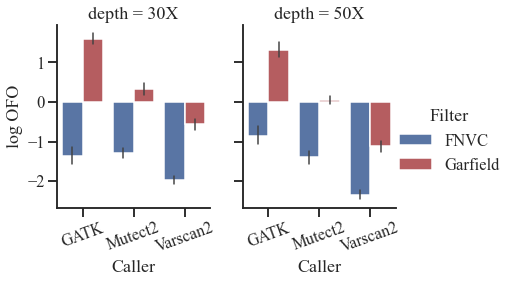

In [32]:
y_metrname = 'log OFO'
g = sns.FacetGrid(data=data8_df, col='depth', height=4, aspect=0.75)
g.map(sns.barplot, 'caller', y_metrname, 'filter', order=list(order_caller.values()),
    hue_order=list(order_filter.values()), palette=[snsdeep[i] for i in [0,3]], errwidth=1.5)
for ax in g.axes.flat:
    ax.set_xticks(np.arange(len(order_caller)))
    ax.set_xticklabels(list(order_caller.values()))
    for label in ax.get_xticklabels():
        label.set_rotation(20)
g.set_xlabels('Caller')
g.add_legend(title='Filter')
# g.set(ylim=(0,1.3))
g.savefig(path.join(PLOT_PATH, '8_{}_{}.pdf'.format(consis, y_metrname)))
plt.show()

# 9. inconsistent region, all callers

In [35]:
consis = 'inconsistent'
data9_df = load_from_pickle('./release/data8_{}.pickle'.format(consis), DATABASE_PATH)
for i in range(7):
    data9_df[data9_df.columns[i]] = data9_df[data9_df.columns[i]].astype(float)
data9_df['caller'] = data9_df['caller'].map(order_caller2)
data9_df['coding'] = data9_df['coding'].map(order_coding)
order_filter = order_filter_inconsis
data9_df['filter'] = data9_df['filter'].map(order_filter)
data9_df['order_filter'] = data9_df['filter'].apply(lambda x: list(order_filter.values()).index(x))
data9_df['log OFO'] = data9_df['OFO'].apply(nanlog10)
# data6_df

loading ./release/data8_inconsistent.pickle from /mnt/d/Document/Master/ProjectRYY/plot


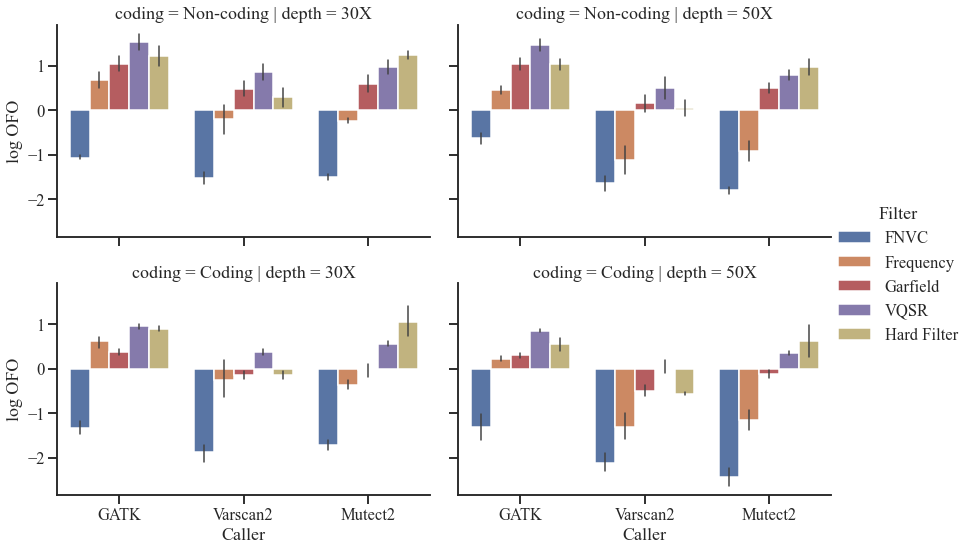

In [36]:
y_metrname = 'log OFO'
g = sns.FacetGrid(data=data9_df, row='coding', col='depth', height=4, aspect=1.5)
g.map(sns.barplot, 'caller', y_metrname, 'filter', order=['GATK', 'Varscan2', 'Mutect2'],
    hue_order=list(order_filter.values()), palette=[snsdeep[i] for i in [0,1,3,4,8]], errwidth=1.5)
g.set_xlabels('Caller')
g.add_legend(title='Filter')
# g.set(ylim=(-0.8,1.3))
# g.savefig(path.join(PLOT_PATH, '6_{}_{}.pdf'.format(consis, y_metrname)))
plt.show()

# suppl 1. importance score

In [37]:
gatk_feature = {'MQ':0, 'MQRankSum':1, 'MQ0':2, 'MBQ':3, 'BaseQRankSum':4, 'MFRL':5, 'MPOS':6, 'ReadPosRankSum':7, 'RPA':8, 'RPA2':9, 'RU':10, 'SOR':11, 'FS':12, 'QD':13, 'ExcessHet':14, 'GQ_MEAN':15, 'AS_SB_TABLE':16, 'AS_UNIQ_ALT_READ_COUNT':17, 'AF':18, 'CT':19}
varscan_feature = {'MQ':0, 'MQRankSum':1, 'MQ0':2, 'MBQ':3, 'BaseQRankSum':4, 'MFRL':5, 'MPOS':6, 'ReadPosRankSum':7, 'RPA':8, 'RPA2':9, 'RU':10, 'SOR':11, 'FS':12, 'GQ_MEAN':13, 'AS_SB_TABLE':14, 'AS_UNIQ_ALT_READ_COUNT':15, 'AF':16, 'CT':17}
mutect2_feature = {'MQ':0, 'MQRankSum':1, 'MQ0':2, 'MBQ':3, 'BaseQRankSum':4, 'MFRL':5, 'MPOS':6, 'ReadPosRankSum':7, 'RPA':8, 'RPA2':9, 'RU':10, 'SOR':11, 'FS':12, 'AS_SB_TABLE':13, 'AS_UNIQ_ALT_READ_COUNT':14, 'AF':15, 'CT':16}
gatk_feat = {v:k for k,v in gatk_feature.items()}
varscan_feat = {v:k for k,v in varscan_feature.items()}
mutect2_feat = {v:k for k,v in mutect2_feature.items()}
feat_dict = {'gatk':gatk_feat, 'varscan':varscan_feat, 'mutect2':mutect2_feat}
order_feature = [
    'RPA', 'RPA2', 'RU', 'CT', 
    'MBQ', 'MQRankSum', 'MPOS', 'ReadPosRankSum', 'SOR', 'FS', 'QD', 'ExcessHet',
    'MQ', 'MQ0', 'MQRankSum', 'GQ_MEAN', 'AS_UNIQ_ALT_READ_COUNT', 'AS_SB_TABLE', 'MFRL', 'AF']
source = [*['Sequence context']*4, *['Sequencing experiment']*8 ,*['Bioinformatics']*8]
source_feature = {k:v for k,v in zip(order_feature, source)}

In [38]:
dataS1_list = []
for caller in ['gatk','mutect2','varscan']:
    dataS1_df_ = pd.melt(load_from_pickle('./release/dataS1_imp_{}.pickle'.format(caller), DATABASE_PATH), id_vars=['caller','mutation','pcode'], var_name='feature', value_name='importance score')
    dataS1_df_['feature'] = dataS1_df_['feature'].map(feat_dict[caller])
    
    dataS1_list.append(dataS1_df_)
dataS1_df = pd.concat(dataS1_list)
dataS1_df['source'] = dataS1_df['feature'].map(source_feature)

loading ./release/dataS1_imp_gatk.pickle from /mnt/d/Document/Master/ProjectRYY/plot
loading ./release/dataS1_imp_mutect2.pickle from /mnt/d/Document/Master/ProjectRYY/plot
loading ./release/dataS1_imp_varscan.pickle from /mnt/d/Document/Master/ProjectRYY/plot


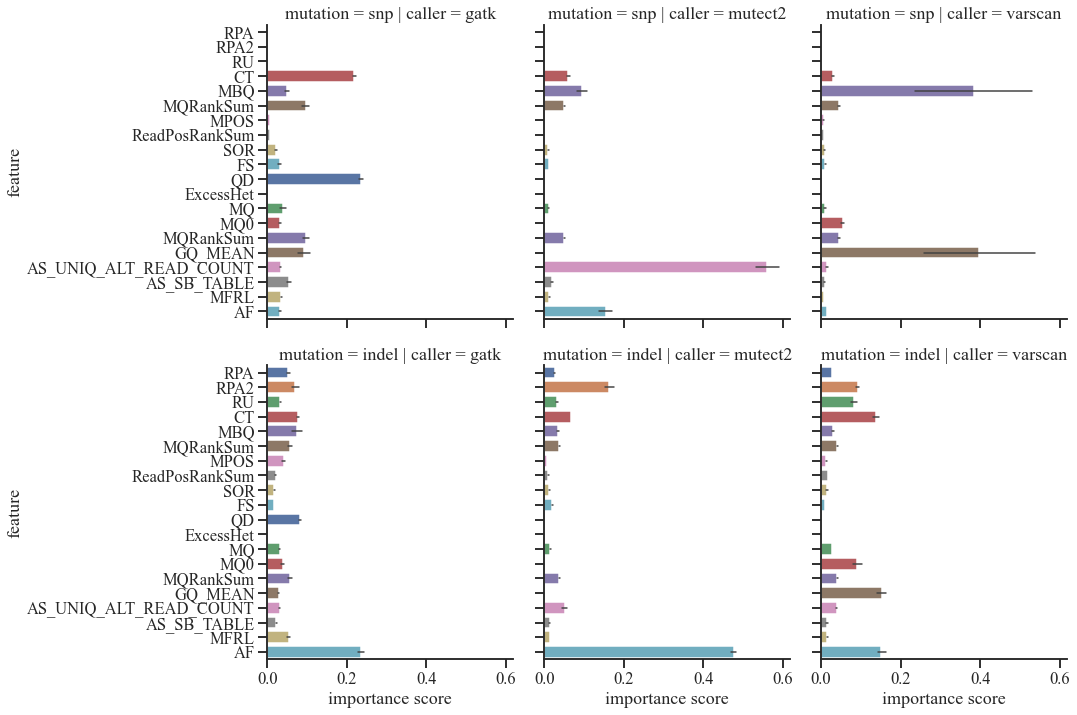

In [39]:
sns.catplot(data=dataS1_df, row='mutation', col='caller', kind='bar', height=5, aspect=1,
    x='importance score', y='feature', order=order_feature,
    color='blue', palette='deep', errwidth=1.5)
# plt.savefig('../plot/fig/S1_featimp.pdf')